# Reacher report

This notebook shows the results of training a RL agent to solve the Reacher problem (Unity environment). <br>

The DDPG algorithm (Lillicrap et al, 2015) was used as a basis for this work. The agent consists of two trained neural networks - an actor which learns a deterministic policy (maps a state to continuous action values), and a critic which learns to estimate the action value function Q. Relay memory and seperate target networks are used to aid stability. <br>


Both the actor and critic are fully connected networks with 2 hidden layers. The actor takes the state as the input, the critic takes the state and chosen action as an input (unlike in Lillicrap et al, 2015, the action values are included from the first layer of the neural network). A soft update function is used to update the target netowrks from the local networks.

Parameters of the network and training algorith are as follows:
* Both actor and critic have 2 hidden layers, each with 300 units. Both use a ReLU activation function on hidden layers.
* The actor network uses a tanh function on the final layer, so that action values are between -1 and 1.
* The replay buffer stores a maximum of 1 million experiences, and each step a randomly sampled batch of size 32 is used to learn.
* An Ornstein-Uhlenbeck Noise process creates temporally correlated noise to add to the action values. Parameters are $\theta = 0.15$ and $\sigma = 0.2$.
* An ADAM optimiser is used for both networks, the Actor and Critic have learning rates of 1e-4, and 1e-3 respectively.
* A soft update process is used for both networks with $\tau = 0.001$
* The discount factor is $\gamma = 0.99$.
* Training was done using a single agent using 500 episodes.

## Results

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
def moving_average(a, n) :
    '''
    Calculates the moving average of an input list a, over a window of size n. 
    Returns the array of averages and the position of the final value in the window for each value
    '''
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ave = ret[n - 1:] / n
    inds = list(range(n,len(ave)+n))
    return(ave,inds)

In [3]:
fname = './checkpoints/20200509_132504_scores_Final.pkl'
scores_history = pickle.load(open(fname,'rb'))
scores_history = np.mean(np.array(scores_history),axis=1)
#Only a single environment was used to train, so for each episode only 1 score is saved. If multiple environments were used,
#takig the mean across axis 1 ensures the value plotted is the mean value from each environment that episode.

The scores the agent recieved over time (number of episodes completed) are shown below. The list of scores for each episode is saved in a pickle file: './checkpoints/20200509_132504_scores_Final.pkl'. The raw scores are shown in pale red, the average score for the last 100 episodes is shown in dark red.

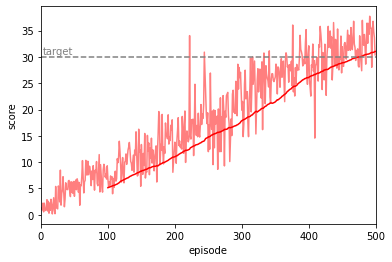

In [4]:
colour='red'
smooth_period = 100

fig,ax = plt.subplots()

ave,inds = moving_average(scores_history,smooth_period)
ax.plot(inds,ave,color=colour)
ax.plot(scores_history,color=colour,alpha=0.5)
ax.set_xlabel('episode')
ax.set_ylabel('score')
ax.axhline(30,color='0.5',ls='--')
ax.set_xlim(0,500)
ax.text(2,30.5,'target',color='0.5')
plt.show()

The average score over the last 100 episodes of training is shown below.

In [5]:
print('Average score over last 100 episodes = %.3f'%(np.mean(scores_history[-100:])))

Average score over last 100 episodes = 31.045


## Possible improvements
A few improvements could be made to increase the performance of the agent:
* Run for more episodes. As can be seen from the graph above, the performance of the agent was steadily increasing in a roughly linear manner, so it looks possible that training beyond 500 episodes would result in a higher average score.
* Train using 20 agents and batch normalisation of scores at each step
* Use prioritized experience replay to increase the likelihood of important experiences being sampled.
* Experiment with alternative algorithms, for example use A3C with N-step bootstrapping instead of the 1 step bootstrap used in this method